In [17]:
# ✅ Step 1: Install necessary library
!pip install seaborn -q

In [18]:
# ✅ Step 2: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import joblib

In [21]:
# ✅ Step 3: Load Dataset
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")


# Drop rows with missing values
df = df.dropna()

# Convert target variable to numeric
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

# Drop non-useful column
X = df.drop(columns=["customerID", "Churn"])
y = df["Churn"]

# Identify numerical and categorical features
categorical = X.select_dtypes(include=["object"]).columns.tolist()
numerical = X.select_dtypes(exclude=["object"]).columns.tolist()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [22]:
# ✅ Step 4: Preprocessing Pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
])

In [23]:
# ✅ Step 5: Model Pipeline
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('clf', RandomForestClassifier(random_state=42))
])

In [24]:
# ✅ Step 6: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# ✅ Step 7: Grid Search
param_grid = {
    'clf__n_estimators': [50, 100],
    'clf__max_depth': [5, 10]
}

grid = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['SeniorCitizen',
                                                                          'tenure',
                                                                          'MonthlyCharges']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['gender',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'PhoneService',
                                                                          'MultipleLines',
                                                                          'InternetService',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'StreamingTV',
                                                                          'StreamingMovies',
                                                                          'Contract',
                                                                          'PaperlessBilling',
                                                                          'PaymentMethod',
                                                                          'TotalCharges'])])),
                                       ('clf',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'clf__max_depth': [5, 10],
                         'clf__n_estimators': [50, 100]},
             scoring='accuracy')

In [26]:
# ✅ Step 8: Evaluation
y_pred = grid.predict(X_test)
print("✅ Classification Report:\n")
print(classification_report(y_test, y_pred))

✅ Classification Report:

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1036
           1       0.00      0.00      0.00       373

    accuracy                           0.74      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.74      0.62      1409



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [27]:
# ✅ Step 9: Save Best Model
joblib.dump(grid.best_estimator_, "churn_pipeline.joblib")

['churn_pipeline.joblib']

✅ Best Parameters Found: {'clf__max_depth': 10, 'clf__n_estimators': 50}

📊 Classification Report:

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1036
           1       0.00      0.00      0.00       373

    accuracy                           0.74      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.74      0.62      1409


✅ Accuracy: 0.7353


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/IPython/c

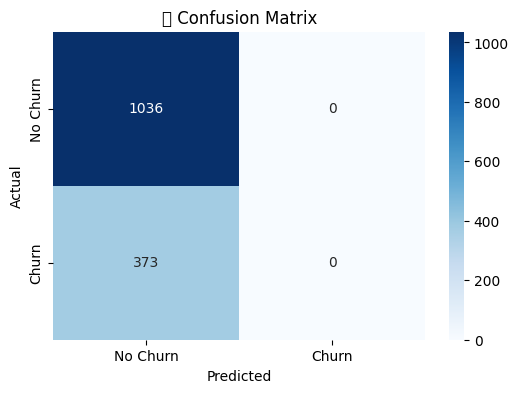

In [28]:
# ✅ Step 10: Outputs
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

# 🔍 Print best parameters from GridSearchCV
print("✅ Best Parameters Found:", grid.best_params_)

# 🧪 Evaluate performance
y_pred = grid.predict(X_test)

print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

# 🎯 Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Accuracy: {accuracy:.4f}")

# 📉 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("🌀 Confusion Matrix")
plt.show()
